3DIMG_07NOV2019_2200_L1C_SGP.tif
3DIMG_07NOV2019_2230_L1C_SGP.tif
3DIMG_07NOV2019_2300_L1C_SGP.tif
3DIMG_07NOV2019_2330_L1C_SGP.tif
TIR
Baseline MSE -  1020.4121
Optical Flow MSE -  811.3031


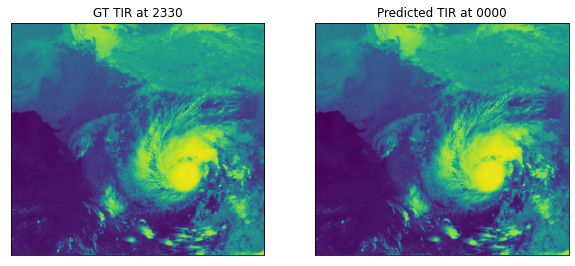

3DIMG_07NOV2019_2200_L1C_SGP_vis.tif
3DIMG_07NOV2019_2230_L1C_SGP_vis.tif
3DIMG_07NOV2019_2300_L1C_SGP_vis.tif
3DIMG_07NOV2019_2330_L1C_SGP_vis.tif
VIS
Baseline MSE -  8.921081
Optical Flow MSE -  7.847029


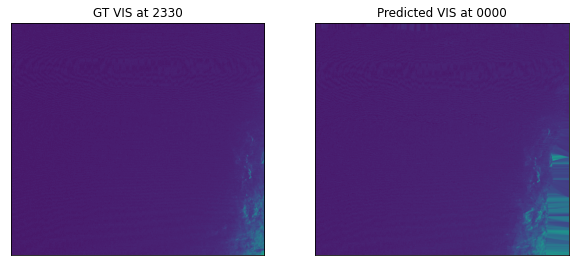

In [22]:
# git link - https://github.com/hydrogo/rainymotion

import os
import random
import numpy as np
from PIL import Image
from rainymotion.models import *
import time
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("/home/prasad/")
from utils.pre_processing import get_seq_data


start = time.time()

dir_paths = ["./../pytorch-unet/INSAT3D_TIR1_India", "./../pytorch-unet/INSAT3D_VIS_India" ]
print_format = ['TIR','VIS']

inp_seq = 3
pred_frame = 1

#for evaluation
inp =  [ ['3DIMG_07NOV2019_2200_L1C_SGP.tif','3DIMG_07NOV2019_2230_L1C_SGP.tif','3DIMG_07NOV2019_2300_L1C_SGP.tif'],
         ['3DIMG_07NOV2019_2200_L1C_SGP_vis.tif','3DIMG_07NOV2019_2230_L1C_SGP_vis.tif','3DIMG_07NOV2019_2300_L1C_SGP_vis.tif'] ]

target = [ ['3DIMG_07NOV2019_2330_L1C_SGP.tif'],
           ['3DIMG_07NOV2019_2330_L1C_SGP_vis.tif'] ]

# for final output
last_sequence = [ ['3DIMG_07NOV2019_2230_L1C_SGP.tif','3DIMG_07NOV2019_2300_L1C_SGP.tif','3DIMG_07NOV2019_2330_L1C_SGP.tif'],
                    ['3DIMG_07NOV2019_2230_L1C_SGP_vis.tif','3DIMG_07NOV2019_2300_L1C_SGP_vis.tif','3DIMG_07NOV2019_2330_L1C_SGP_vis.tif'] ]

for i,dir_path in enumerate(dir_paths):    
    # get images in numpy array
    img1, img2,gt = [],[],[]
    for j in range(inp_seq):
        img1.append( np.array(Image.open( os.path.join( dir_path, inp[i][j] ) ) ) )
        img2.append( np.array(Image.open( os.path.join( dir_path, last_sequence[i][j] ) ) ) )
        print(inp[i][j])
        
        
        
    gt = np.array( Image.open( os.path.join(dir_path,target[i][0]) ) ) 
    latest = np.array( Image.open( os.path.join( dir_path, inp[i][-1] ) ) )   # most recent image for prediction at 2330              
    print(target[i][0])
    
    img1, img2, gt = np.array(img1), np.array(img2), np.array(gt)

    # Dense optical flow model
    model = Dense()

    model.input_data = img2
    model.lead_steps = pred_frame
    nowcast2 = model.run()   #prediction

    model.input_data = img1
    nowcast1 = model.run()   #prediction


    of_mse = ((gt - nowcast1 )**2).mean() 
    bmse = ((latest-gt)**2).mean() 
    print( print_format[i] )
    print( "Baseline MSE - ", bmse )
    print("Optical Flow MSE - ", of_mse )

    Image.fromarray( np.squeeze(nowcast2) ).save( f"optical_flow_8nov_12am_{print_format[i]}.tif" )
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
    plt.imshow(gt)
    ax.set_title(f"GT {print_format[i]} at 2330")
    ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
    plt.imshow(np.squeeze(nowcast2))
    ax.set_title(f"Predicted {print_format[i]} at 0000" )
    
    plt.show()